# GLMCC example usage

In [1]:
import pandas as pd  # pandas is not required for GLMCC itself; if you don't have one yet, you need to install manually
import matplotlib.pyplot as plt

from glmcc import GLMCC  # model
from glmcc import spiketime_relative

load sample data with pandas.  
This sample data is taken from the [original code](https://github.com/NII-Kobayashi/GLMCC) and edited by the author.  
**Note that "spiketime" should be in msec scale, not in sec scale.**

In [2]:
df = pd.read_csv('./sample_data.csv')  # spike train in msec scale
display(df.head())

,neuron,spiketime
0,1,20.95
1,1,93.55
2,1,107.40
3,1,116.45
4,1,218.45


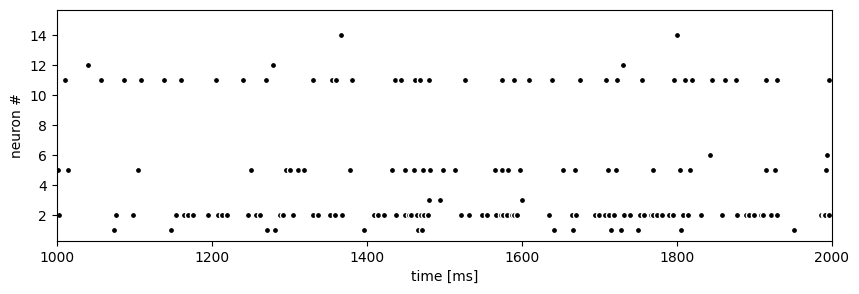

In [3]:
# rasterplot
start, end = 1000.0, 2000.0  # msec

plt.figure(figsize=(10, 3))
plt.scatter(df.spiketime, df.neuron, s=20, c='k', edgecolors='w')
plt.xlim(start, end)
plt.xlabel('time [ms]')
plt.ylabel('neuron #')
plt.show()

To simply look at cross-correlogram between two neurons, do as below.

GLM not fitted yet, plotting only cross-correlogram


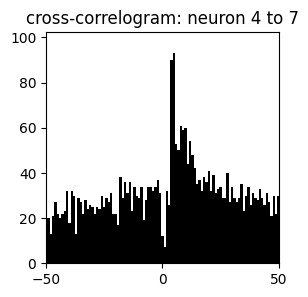

In [4]:
glm = GLMCC(delay=4.0)  # set synaptic delay to initialize GLMC

fig, ax = plt.subplots(figsize=(3, 3))
idx_i, idx_j = 4, 7

# relative spiketime (target neuron - reference neuron)
t_sp = spiketime_relative(spiketime_tar=list(df.query('neuron==@idx_i').spiketime), 
                          spiketime_ref=list(df.query('neuron==@idx_j').spiketime), window_size=50.0)
glm.plot(ax=ax, t_sp=t_sp)

ax.set_title(f'cross-correlogram: neuron {idx_i} to {idx_j}')
plt.show()

Let's estimate the synaptic weights with GLMCC based on the cross-correlogram above.

In [5]:
def fit_and_plot(ax, idx_i, idx_j, delay, window_size=50.0, verbose=True):
    # prepare relative spiketime (target neuron - reference neuron)
    t_sp = spiketime_relative(spiketime_tar=list(df.query('neuron==@idx_i').spiketime), 
    spiketime_ref=list(df.query('neuron==@idx_j').spiketime), window_size=window_size)

    # model settings
    glm = GLMCC(delay=delay)  # tune synaptic delay
    glm.fit(t_sp, verbose=verbose)
    glm.plot(ax=ax, t_sp=t_sp)

    # recommended plot layouts
    ax.set_xlabel(r'$\tau [ms]$', fontsize=16)
    ax.set_ylabel(r'$C(\tau)$', fontsize=16)
    ax.set_title(f'neuron {idx_i} to {idx_j}', fontsize=18)
    ax.tick_params(direction='in', which='major', labelsize=12)
    ax.yaxis.set_major_locator(plt.MaxNLocator(5))
    return glm

iterations until convergence: 21
=============== GLMCC summary ===============
connectivity from neuron j to neuron i: 
	 estimated J_ij, J_ji: 1.04, -0.01
	 threshold J_ij, J_ji: 0.44, 0.46
max log posterior: 7884


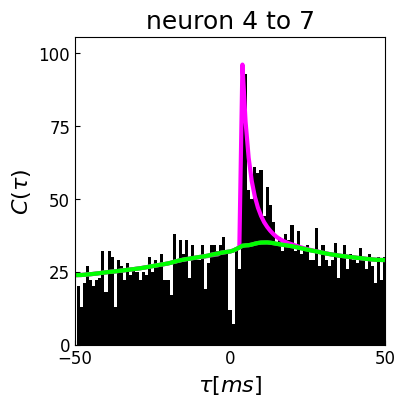

In [7]:
fig, ax = plt.subplots(figsize=(4, 4))
glm = fit_and_plot(ax=ax, idx_i=4, idx_j=7, delay=4.0)
glm.summary()
plt.show()

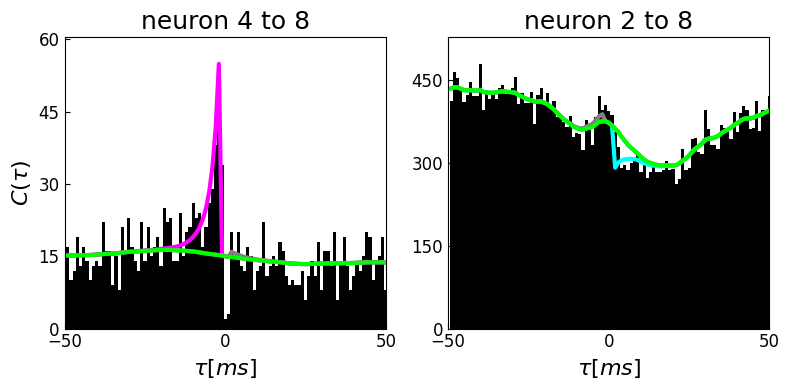

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

fit_and_plot(ax=axes[0], idx_i=4, idx_j=8, delay=2.0, verbose=False)
fit_and_plot(ax=axes[1], idx_i=2, idx_j=8, delay=2.0, verbose=False)

axes[1].set_ylabel('')

fig.tight_layout()
plt.show()